## Clustering Music Genres with Machine Learning

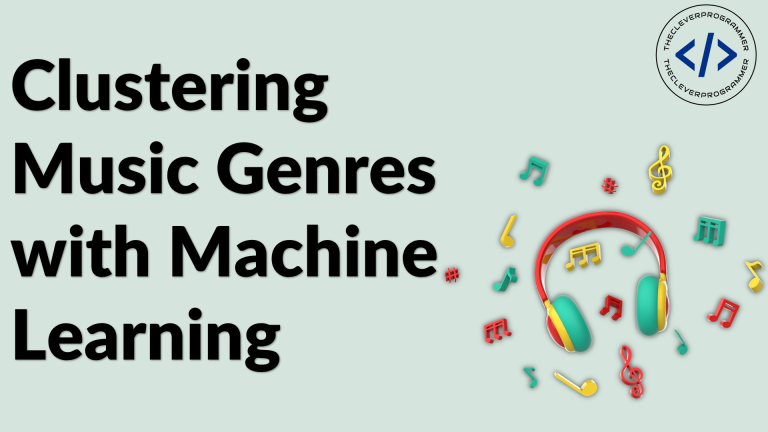

Clustering is a machine learning technique to group data points characterized by specific features. Clustering music genres is a task of grouping music based on the similarities in their audio characteristics.

## Clustering Music Genres (Problem Statement)

Every person has a different taste in music. We cannot identify what kind of music does a person likes by just knowing about their lifestyle, hobbies, or profession. So it is difficult for music streaming applications to recommend music to a person. But if we know what kind of songs a person listens to daily, we can find similarities in all the music files and recommend similar music to the person.

That is where the cluster analysis of music genres comes in. Here you are given a dataset of popular songs on Spotify, which contains artists and music names with all audio characteristics of each music. Your goal is to group music genres based on similarities in their audio characteristics.

## Clustering Music Genres using Python

I hope you have understood the problem statement mentioned above on clustering music genres with machine learning. Now let’s start with this task by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
from sklearn  import cluster

music = pd.read_csv("Spotify-2000.csv")
music.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


You can see all the columns of the dataset in the above output. It contains all the audio features of music that are enough to find similarities. Before moving forward, I will drop the index column, as it is of no use:

In [2]:
music = music.drop("Index" , axis = 1)

Now let’s have a look at the correlation between all the audio features in the dataset:

In [4]:
music.corr(numeric_only= True)

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Year,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,-0.122472,0.085598,-0.003181
Energy,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,-0.665156,0.205865,0.103393
Danceability,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135769,0.125229,0.144344
Loudness (dB),0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.451635,0.125090,0.165527
Liveness,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,-0.046206,0.092594,-0.111978
Valence,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.239729,0.107102,0.095911
Acousticness,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,1.000000,-0.098256,-0.087604
Speechiness,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.098256,1.000000,0.111689
Popularity,-0.158962,-0.003181,0.103393,0.144344,0.165527,-0.111978,0.095911,-0.087604,0.111689,1.000000


## Clustering Analysis of Audio Features

Now I will use the K-means clustering algorithm to find the similarities between all the audio features. Then I will add clusters in the dataset based on the similarities we found. So let’s create a new dataset of all the audio characteristics and perform clustering analysis using the K-means clustering algorithm:

In [7]:
cluster_music = music[["Beats Per Minute (BPM)","Loudness (dB)","Liveness","Valence","Acousticness","Speechiness"]]
cluster_music.head()

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness
0,157,-14,11,68,94,3
1,135,-11,17,81,17,7
2,168,-9,7,52,2,17
3,173,-4,3,37,0,4
4,106,-5,10,87,1,3


In [8]:
from sklearn.preprocessing import MinMaxScaler
for m in music.columns:
    MinMaxScaler(m)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 10)
clusters = kmeans.fit_predict(cluster_music)

Now I will add the clusters as predicted by the K-means clustering algorithm to the original dataset:

In [12]:
music["Music Segments"] = clusters

MinMaxScaler(music["Music Segments"])

music["Music Segments"] = music["Music Segments"].map({1:"Cluster 1" , 2 : "Cluster 2" , 3 : "Cluster 3",
                                                      4:"Cluster 4", 5:"Cluster 5" , 6 : "Cluster 6", 
                                                      7: "Cluster 7" , 8: "Cluster 8", 9:"Cluster 9",10: "Cluster 10"})

Now let’s have a look at the dataset with clusters:

Now let’s visualize the clusters based on some of the audio features:

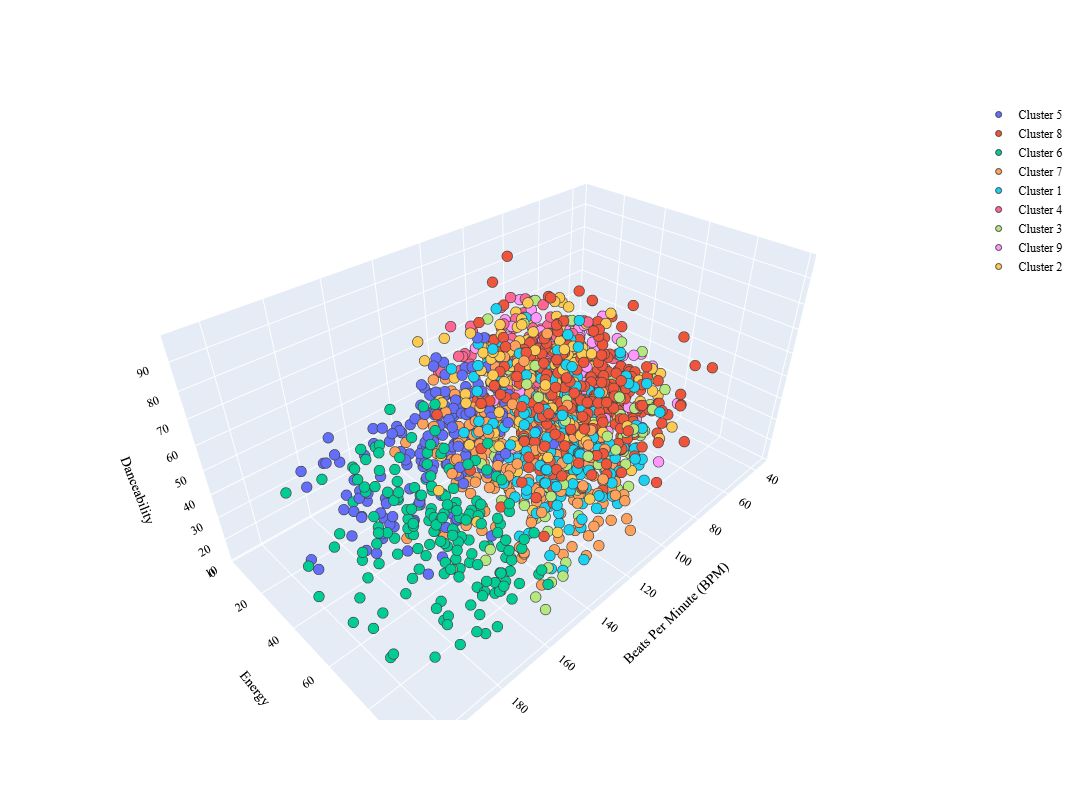

In [18]:
import plotly.graph_objects as go

Vis_music_cluster = go.Figure()

for i in list(music["Music Segments"].unique()):


    Vis_music_cluster.add_trace(go.Scatter3d(x = music[music["Music Segments"] == i]["Beats Per Minute (BPM)"],
                                             y = music[music["Music Segments"] == i]["Energy"],
                                             z = music[music["Music Segments"] == i]["Danceability"],
                                             mode = "markers" , marker_size = 6 , marker_line_width = 1,
                                             name = str(i) 
                                            ))

Vis_music_cluster.update_traces(hovertemplate = "Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}")

Vis_music_cluster.update_layout(width = 800 , height = 800 , autosize = True , showlegend = True,
                               scene = dict(xaxis = dict(title = "Beats Per Minute (BPM)"),
                                           yaxis = dict(title = "Energy"),
                                           zaxis = dict(title = "Danceability")),
                               font = dict(family = "Gilroy",color = "black" , size = 12))

Vis_music_cluster.show()

So this is how we can perform cluster analysis of music genres with machine learning.

## Summary


So this is how you can perform cluster analysis of music genres with machine learning using Python. Clustering music genres is a task of grouping music based on the similarities in their audio features. 